In [1]:
from jet.data import sal
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
%matplotlib inline

In [2]:
sal.authenticate()

The server [https://sal.jet.uk] requires authentication.


User:  dgallart
Password:  ········


In [3]:
def loc_time(data,time):
    return data.dimensions[0].data[data.dimensions[0].data >= time][0]
def loc_index(data,time):
    return np.where(data.dimensions[0].data == loc_time(data,time))

In [4]:
#millor
def time_index(value,time):
    return np.where(value.dimensions[0].data >= time)[0][0]
def value_time(value,time):
    return value.data[time_index(value,time)]

In [5]:
set_shots = [99596, 99594, 99597, 99886, 99884, 99629, 99633, 99639]
shots =[99596, 99594, 99597, 99886, 99884, 99629, 99633, 99639]
times = [48.75, 48.9, 48.95, 49.1, 48.9, 48.9, 49.1, 48.9]

In [6]:
data_te = []
data_ne = []
data_ti = []
for i in set_shots:
    a = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/hrt2/te')
    b = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/hrt2/ne')
    c = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/tion/ti')
    data_te.append(a)
    data_ne.append(b)
    data_ti.append(c)

In [7]:
shots =[99596, 99594, 99597, 99886, 99884, 99629, 99633, 99639]
times = [48.75, 48.9, 48.95, 49.1, 48.9, 48.9, 49.1, 48.9]

In [8]:
a_99594 = sal.get('/pulse/'+'99594'+'/ppf/signal/jetppf/pion/rdt:181')
b_99594 = sal.get('/pulse/'+'99594'+'/ppf/signal/dtaylor/pion/rdt:469')
a_99596 = sal.get('/pulse/'+'99596'+'/ppf/signal/jetppf/pion/rdt:196')
b_99596 = sal.get('/pulse/'+'99596'+'/ppf/signal/dtaylor/pion/rdt:523')
a_99597 = sal.get('/pulse/'+'99597'+'/ppf/signal/jetppf/pion/rdt:209')
b_99597 = sal.get('/pulse/'+'99597'+'/ppf/signal/dtaylor/pion/rdt:444')
a_99597_h = sal.get('/pulse/'+'99597'+'/ppf/signal/mmant/pion/rdt:448')
b_99597_h = sal.get('/pulse/'+'99597'+'/ppf/signal/mmant/pion/rdt:449')
a_99886 = sal.get('/pulse/'+'99886'+'/ppf/signal/jetppf/pion/rdt:236')
b_99886 = sal.get('/pulse/'+'99886'+'/ppf/signal/dtaylor/pion/rdt:457')
a_99886_h = sal.get('/pulse/'+'99886'+'/ppf/signal/mmant/pion/rdt:459')
b_99886_h = sal.get('/pulse/'+'99886'+'/ppf/signal/mmant/pion/rdt:460')
a_99884 = sal.get('/pulse/'+'99884'+'/ppf/signal/jetppf/pion/rdt:222')
b_99884 = sal.get('/pulse/'+'99884'+'/ppf/signal/dtaylor/pion/rdt:471')
a_99884_h = sal.get('/pulse/'+'99884'+'/ppf/signal/mmant/pion/rdt:474')
b_99884_h = sal.get('/pulse/'+'99884'+'/ppf/signal/mmant/pion/rdt:473')
a_99629 = sal.get('/pulse/'+'99629'+'/ppf/signal/chain2/pion/rdt:470')
b_99629 = sal.get('/pulse/'+'99629'+'/ppf/signal/chain2/pion/rdt:475')
a_99633 = sal.get('/pulse/'+'99633'+'/ppf/signal/jetppf/pion/rdt:197')
b_99633 = sal.get('/pulse/'+'99633'+'/ppf/signal/dtaylor/pion/rdt:509')
a_99639 = sal.get('/pulse/'+'99639'+'/ppf/signal/jetppf/pion/rdt:240')
b_99639 = sal.get('/pulse/'+'99639'+'/ppf/signal/dtaylor/pion/rdt:521')


In [9]:
shots =[99596, 99594, 99597, 99886, 99884, 99629, 99633, 99639]
times = [48.75, 48.9, 48.95, 49.1, 48.9, 48.9, 49.1, 48.9]
def rnt_icrh(value1, value2, value3, time, shot, i):
    """Return the energy of neutron yield do to ICRH only in MW"""
    e = 1.602e-19
    energy = 17.6e6
    return (value_time(value1,time) - value_time(value2,time))*e*energy, value_time(value1,time)*e*energy, value_time(value3,time),shot,i

In [12]:
thermal_nbp2 = []
total_nbp2 = []
wdia_efit = []
pin_nbi = []
pin_icrh = []
tot_rnt = []
beamp_rnt = []
wmhd_efit = []

for i in shots:
    print(i)
    a = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/nbp2/yfpt')
    b = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/efit/wdia')
    c = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/nbp2/yft')
    d = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/nbi/ptot')
    e = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/icrh/ptot')
    f = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/tin/rnt')
    g = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/nbp2/yfbt')
    h = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/efit/wp')

    thermal_nbp2.append(a)
    wdia_efit.append(b)
    total_nbp2.append(c)
    pin_nbi.append(d)
    pin_icrh.append(e)
    tot_rnt.append(f)
    beamp_rnt.append(g)
    wmhd_efit.append(h)

99596
99594
99597
99886
99884
99629
99633
99639


In [13]:
cases_icrh = [rnt_icrh(a_99596, b_99596,wdia_efit[0],times[0],'99596', 0),
              rnt_icrh(a_99594, b_99594,wdia_efit[1],times[1],'99594', 1),
              rnt_icrh(a_99597, b_99597,wdia_efit[2],times[2],'99597', 2),
              rnt_icrh(a_99597_h, b_99597_h,wdia_efit[2],times[2],'99597_h', 2),
              rnt_icrh(a_99886, b_99886,wdia_efit[3],times[3],'99886', 3),
              rnt_icrh(a_99886_h, b_99886_h,wdia_efit[3],times[3],'99886_h', 3),
              rnt_icrh(a_99884, b_99884,wdia_efit[4],times[4],'99884', 4),
              rnt_icrh(a_99884_h, b_99884_h,wdia_efit[4],times[4],'99884_h', 4),
              rnt_icrh(a_99629, b_99629,wdia_efit[5],times[5],'99629', 5),
              rnt_icrh(a_99633, b_99633,wdia_efit[6],times[6],'99633', 6),
              rnt_icrh(a_99639, b_99639,wdia_efit[7],times[7],'99639', 7),
              ]
cases_icrh = [rnt_icrh(a_99596, b_99596,wmhd_efit[0],times[0],'99596', 0),
              rnt_icrh(a_99594, b_99594,wmhd_efit[1],times[1],'99594', 1),
              #rnt_icrh(a_99597, b_99597,wmhd_efit[2],times[2],'99597', 2),
              rnt_icrh(a_99597_h, b_99597_h,wmhd_efit[2],times[2],'99597_h', 2),
              #rnt_icrh(a_99886, b_99886,wmhd_efit[3],times[3],'99886', 3),
              rnt_icrh(a_99886_h, b_99886_h,wmhd_efit[3],times[3],'99886_h', 3),
              #rnt_icrh(a_99884, b_99884,wmhd_efit[4],times[4],'99884', 4),
              rnt_icrh(a_99884_h, b_99884_h,wmhd_efit[4],times[4],'99884_h', 4),
              rnt_icrh(a_99629, b_99629,wmhd_efit[5],times[5],'99629', 5),
              rnt_icrh(a_99633, b_99633,wmhd_efit[6],times[6],'99633', 6),
              rnt_icrh(a_99639, b_99639,wmhd_efit[7],times[7],'99639', 7),
              ]

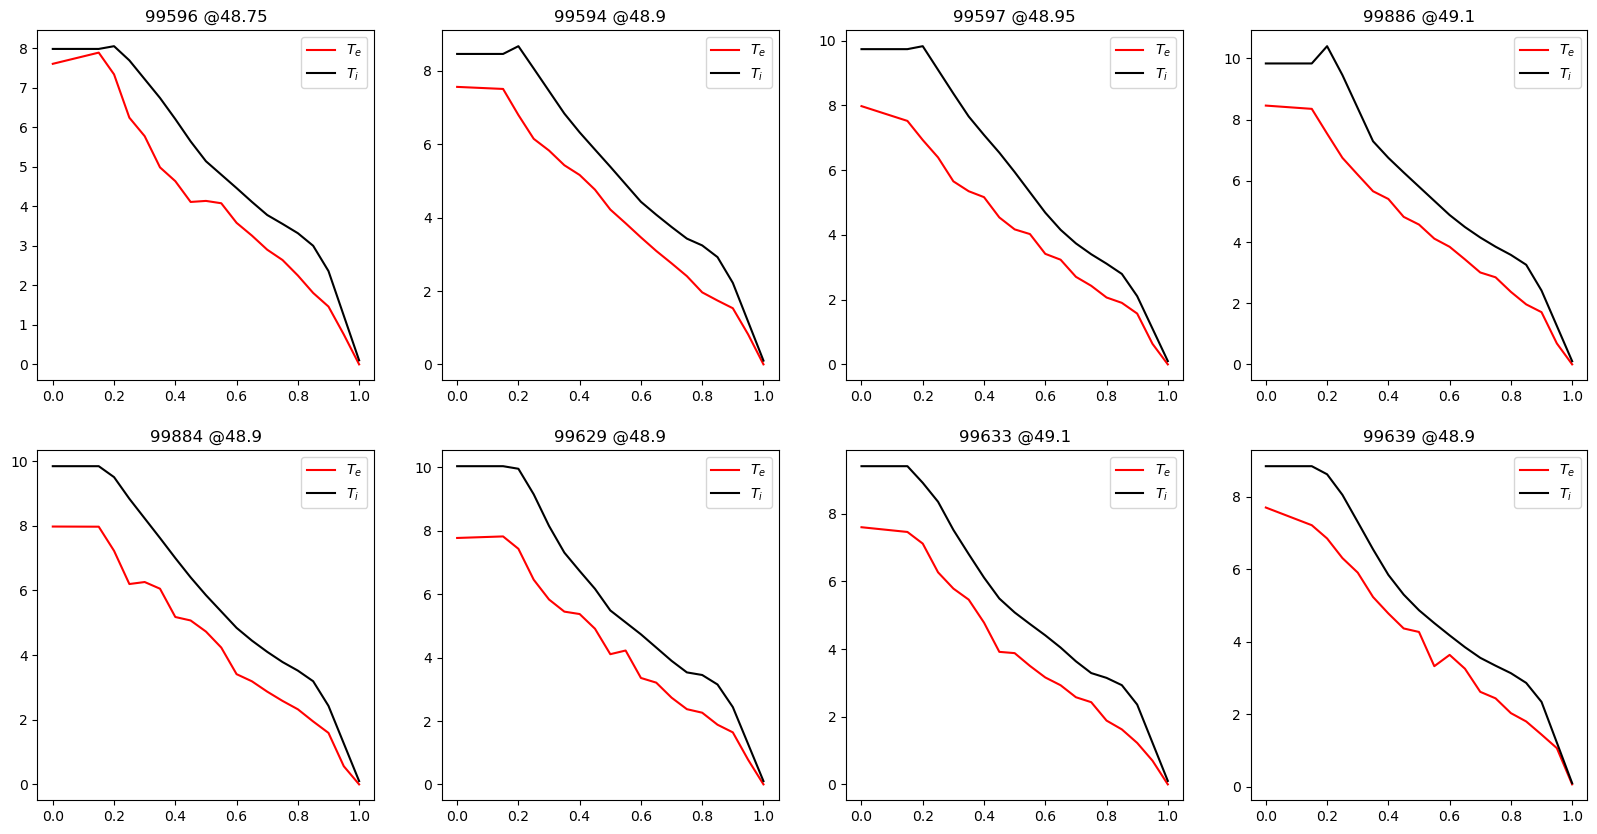

In [14]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize=(20,10))
for i, ax in enumerate(axes[0]):
    ax.set_title(str(set_shots[i])+' '+'@'+str(times[i]))
    ax.plot(data_te[i].dimensions[1].data,data_te[i].data[loc_index(data_te[i],times[i]),:][0,0]/1000,'r', label = '$T_e$')
    ax.plot(data_ti[i].dimensions[1].data,data_ti[i].data[loc_index(data_ti[i],times[i]),:][0,0]/1000,'k', label = '$T_i$')
    ax.legend()
for i, ax in enumerate(axes[1],start=4):
    ax.set_title(str(set_shots[i])+' '+'@'+str(times[i]))
    ax.plot(data_te[i].dimensions[1].data,data_te[i].data[loc_index(data_te[i],times[i]),:][0,0]/1000,'r', label = '$T_e$')
    ax.plot(data_ti[i].dimensions[1].data,data_ti[i].data[loc_index(data_ti[i],times[i]),:][0,0]/1000,'k', label = '$T_i$')
    ax.legend()
plt.savefig('Temperatures.png')

In [15]:
axes

array([[<AxesSubplot:title={'center':'99596 @48.75'}>,
        <AxesSubplot:title={'center':'99594 @48.9'}>,
        <AxesSubplot:title={'center':'99597 @48.95'}>,
        <AxesSubplot:title={'center':'99886 @49.1'}>],
       [<AxesSubplot:title={'center':'99884 @48.9'}>,
        <AxesSubplot:title={'center':'99629 @48.9'}>,
        <AxesSubplot:title={'center':'99633 @49.1'}>,
        <AxesSubplot:title={'center':'99639 @48.9'}>]], dtype=object)

In [16]:
data_te[i].dimensions[1].data

array([0.        , 0.05      , 0.1       , 0.15      , 0.2       ,
       0.25      , 0.3       , 0.35      , 0.4       , 0.45000002,
       0.5       , 0.55      , 0.6       , 0.65000004, 0.7       ,
       0.75      , 0.8       , 0.85      , 0.90000004, 0.95      ,
       1.        ], dtype=float32)

In [17]:
data_te[i].data[loc_index(data_te[i],times[i]),:][0,0]/1000

array([7.7058444 , 7.5434146 , 7.380985  , 7.2185555 , 6.852593  ,
       6.3121414 , 5.91112   , 5.238078  , 4.783823  , 4.370951  ,
       4.2739744 , 3.3299968 , 3.6415603 , 3.2603896 , 2.6227322 ,
       2.4430754 , 2.0353477 , 1.805111  , 1.443618  , 1.0704038 ,
       0.07038318], dtype=float32)

In [18]:
legend_elements = [Line2D([0], [0],marker='*', color='w', label='Thermal yield',
                          markerfacecolor='k', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Total yield',
                          markerfacecolor='k', markersize=10),
                  Line2D([0], [0],marker='s', color='w', label='ICRH only yield',
                          markerfacecolor='k', markersize=10),
                  Line2D([0], [0],marker='+', color='k', label='Beam-plasma yield',
                          markerfacecolor='k', markersize=10),
                  Line2D([0], [0], linewidth=2,linestyle='-', color='k', label='H',),
                  Line2D([0], [0], linewidth=2,linestyle='-', color='r', label='T',),
                  Line2D([0], [0], linewidth=2,linestyle='-', color='b', label='He',)
                  ]

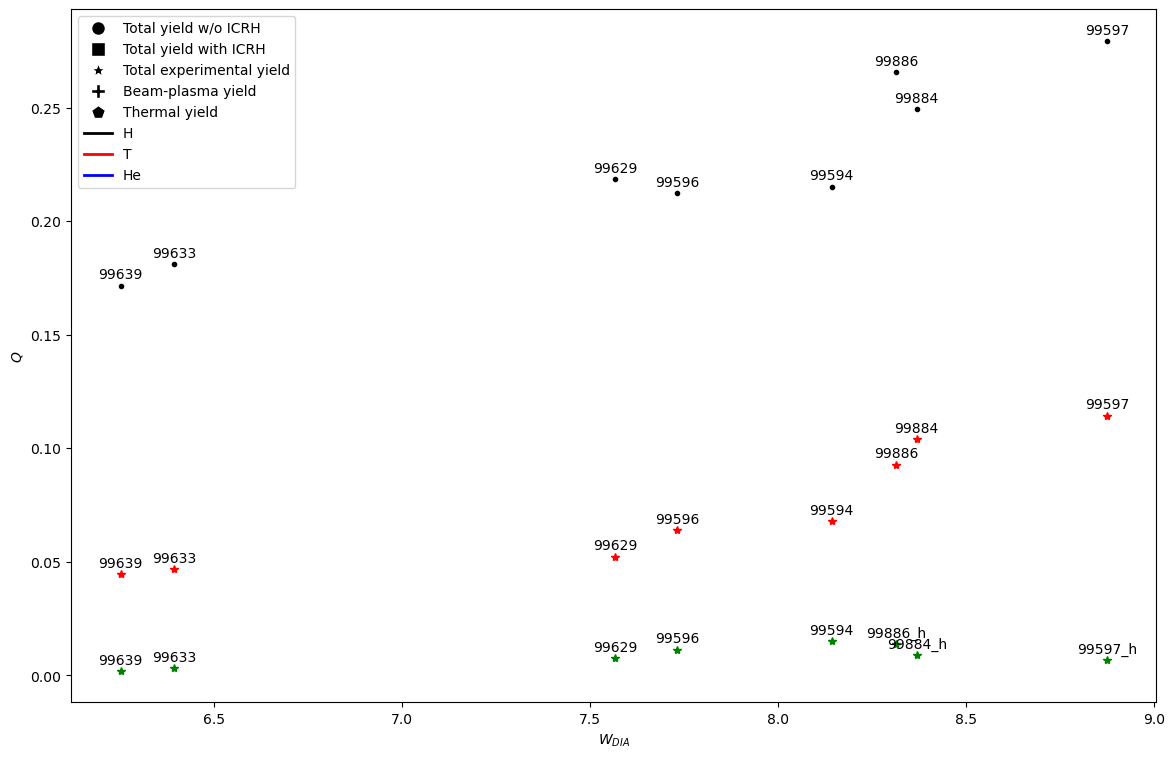

In [46]:
plt.figure(figsize =(14,9))
for i in range(len(shots)):
    X = value_time(wmhd_efit[i], times[i])/1e6
    Z = value_time(pin_nbi[i], times[i])+value_time(pin_icrh[i], times[i])
    Y = value_time(thermal_nbp2[i], times[i])/Z
    Y2 = value_time(total_nbp2[i], times[i])/Z
    plt.xlabel('$W_{DIA}$')
    plt.ylabel('$Q$')
    plt.plot(X,Y,'r*', label = 'Thermal yield')
    plt.plot(X,Y2,'k.', label = 'Total yield')
    plt.annotate("{}".format(shots[i]),(X,Y),textcoords = 'offset points', xytext = (0,5), ha = 'center')
    plt.annotate("{}".format(shots[i]),(X,Y2),textcoords = 'offset points', xytext = (0,5), ha = 'center')
    plt.legend(handles = legend_elements)
for i in cases_icrh:
    Z = value_time(pin_nbi[i[4]], times[i[4]])+value_time(pin_icrh[i[4]], times[i[4]])
    plt.plot(i[2]/1e6,i[0]/Z, 'g*')
    plt.annotate("{}".format(i[3]),(i[2]/1e6,i[0]/Z),textcoords = 'offset points', xytext = (0,5), ha = 'center')
plt.savefig('total.png')

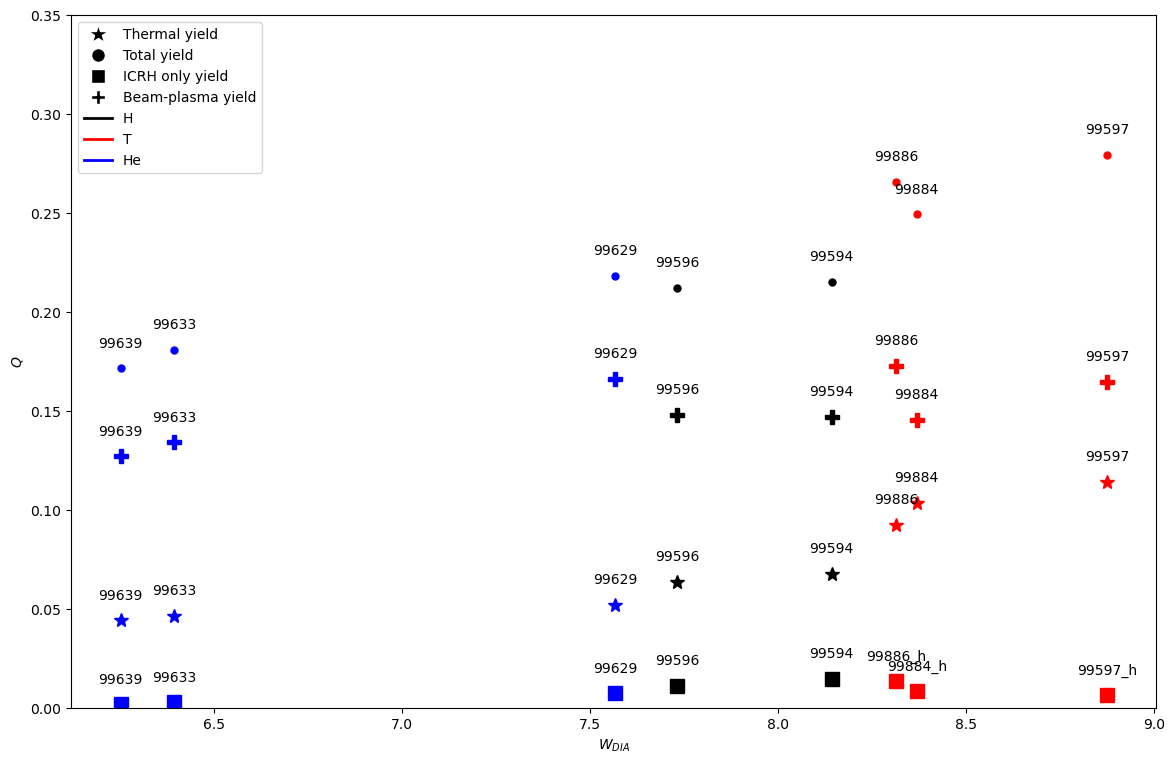

In [47]:
legend_elements = [Line2D([0], [0],marker='*', color='w', label='Thermal yield',
                          markerfacecolor='k', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Total yield',
                          markerfacecolor='k', markersize=10),
                  Line2D([0], [0],marker='s', color='w', label='ICRH only yield',
                          markerfacecolor='k', markersize=10),
                  Line2D([0], [0],marker='P', color='w', label='Beam-plasma yield',
                          markerfacecolor='k', markersize=10),
                  Line2D([0], [0], linewidth=2,linestyle='-', color='k', label='H',),
                  Line2D([0], [0], linewidth=2,linestyle='-', color='r', label='T',),
                  Line2D([0], [0], linewidth=2,linestyle='-', color='b', label='He',)
                  ]
shots_h = [99596,99594]
times_h = [48.75, 48.9]
shots_he = [99629,99633,99639]
times_he = [48.9, 49.1, 48.9]
shots_t =  [99597,99886,99884]
times_t = [48.95, 49.1, 48.9]
plt.figure(figsize =(14,9))
plt.ylim((0,0.35))
for i in range(len(shots)):
    X = value_time(wmhd_efit[i], times[i])/1e6
    Z = value_time(pin_nbi[i], times[i])+value_time(pin_icrh[i], times[i])
    Y = value_time(thermal_nbp2[i], times[i])/Z
    Y2 = value_time(total_nbp2[i], times[i])/Z
    Y3 = value_time(beamp_rnt[i], times[i])/Z
    plt.xlabel('$W_{DIA}$')
    plt.ylabel('$Q$')
    if i <=1:
        plt.plot(X,Y,'k*', markersize = 10, label = 'Thermal yield')
        plt.plot(X,Y2,'k.', markersize = 10, label = 'Total yield')
        plt.plot(X,Y3,'kP', markersize = 10, label = 'Beam-plasma yield')
    elif i <=4:
        plt.plot(X,Y,'r*', markersize = 10, label = 'Thermal yield')
        plt.plot(X,Y2,'r.', markersize = 10, label = 'Total yield')
        plt.plot(X,Y3,'rP', markersize = 10, label = 'Beam-plasma yield')
    else:
        plt.plot(X,Y,'b*', markersize = 10, label = 'Thermal yield')
        plt.plot(X,Y2,'b.', markersize = 10, label = 'Total yield')
        plt.plot(X,Y3,'bP', markersize = 10, label = 'Beam-plasma yield')
    plt.annotate("{}".format(shots[i]),(X,Y),textcoords = 'offset points', xytext = (0,15), ha = 'center')
    plt.annotate("{}".format(shots[i]),(X,Y2),textcoords = 'offset points', xytext = (0,15), ha = 'center')
    plt.annotate("{}".format(shots[i]),(X,Y3),textcoords = 'offset points', xytext = (0,15), ha = 'center')
    plt.legend(handles = legend_elements)
for i in cases_icrh:
    Z = value_time(pin_nbi[i[4]], times[i[4]])+value_time(pin_icrh[i[4]], times[i[4]])
    if i[4] <=1:
        plt.plot(i[2]/1e6,i[0]/Z, 'ks', markersize=10)
    elif i[4] <=4:
        plt.plot(i[2]/1e6,i[0]/Z, 'rs', markersize=10)
    else:
        plt.plot(i[2]/1e6,i[0]/Z, 'bs', markersize=10)
    plt.annotate("{}".format(i[3]),(i[2]/1e6,i[0]/Z),textcoords = 'offset points', xytext = (0,15), ha = 'center')
plt.savefig('total.png')

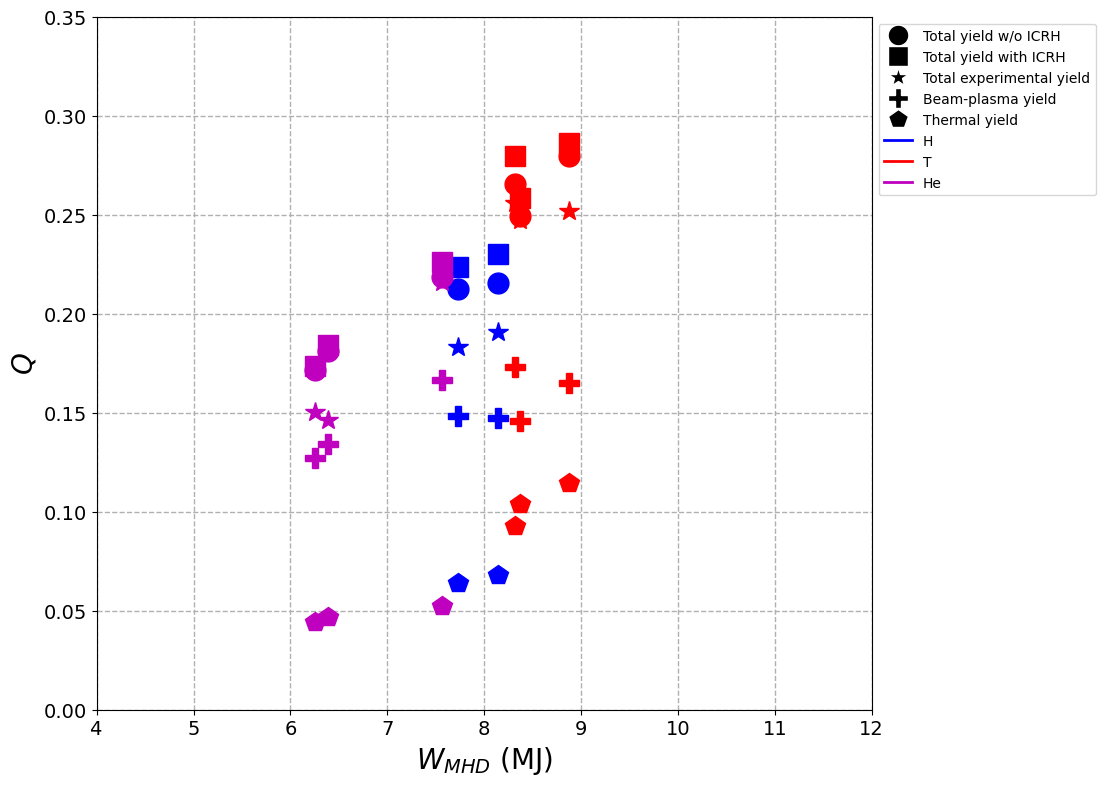

In [76]:
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Total yield w/o ICRH',
                          markerfacecolor='k', markersize=15),
                  Line2D([0], [0],marker='s', color='w', label='Total yield with ICRH',
                          markerfacecolor='k', markersize=15),
                  Line2D([0], [0],marker='*', color='w', label='Total experimental yield',
                          markerfacecolor='k', markersize=15),
                  Line2D([0], [0],marker='P', color='w', label='Beam-plasma yield',
                          markerfacecolor='k', markersize=15),
                    Line2D([0], [0],marker='p', color='w', label='Thermal yield',
                          markerfacecolor='k', markersize=15),
                  Line2D([0], [0], linewidth=2,linestyle='-', color='b', label='H',),
                  Line2D([0], [0], linewidth=2,linestyle='-', color='r', label='T',),
                  Line2D([0], [0], linewidth=2,linestyle='-', color='m', label='He',)
                  ]
shots_h = [99596,99594]
times_h = [48.75, 48.9]
shots_he = [99629,99633,99639]
times_he = [48.9, 49.1, 48.9]
shots_t =  [99597,99886,99884]
times_t = [48.95, 49.1, 48.9]
plt.figure(figsize =(10,9))
plt.xlabel('$W_{MHD}$ (MJ)', fontsize=20)
plt.ylabel('$Q$', fontsize=20)
plt.ylim((0.,0.35))
plt.xlim((4,12))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i in cases_icrh:
    Z = value_time(pin_nbi[i[4]], times[i[4]])+value_time(pin_icrh[i[4]], times[i[4]])
    Y = (i[0]+value_time(total_nbp2[i[4]], times[i[4]]))/Z
    Y2 = value_time(total_nbp2[i[4]], times[i[4]])/Z
    Y3 = value_time(tot_rnt[i[4]], times[i[4]])*17.6e6*1.602e-19/Z
    Y4 = value_time(beamp_rnt[i[4]], times[i[4]])/Z
    Y5 = value_time(thermal_nbp2[i[4]], times[i[4]])/Z
    if i[4] <=1:
        plt.plot(i[2]/1e6,Y, 'bs', markersize=15)
        plt.plot(i[2]/1e6,Y2, 'bo', markersize=15)
        plt.plot(i[2]/1e6,Y3, 'b*', markersize=15)
        plt.plot(i[2]/1e6,Y4, 'bP', markersize=15)
        plt.plot(i[2]/1e6,Y5, 'bp', markersize=15)
    elif i[4] <=4:
        plt.plot(i[2]/1e6,Y, 'rs', markersize=15)
        plt.plot(i[2]/1e6,Y2, 'ro', markersize=15)
        plt.plot(i[2]/1e6,Y3, 'r*', markersize=15)
        plt.plot(i[2]/1e6,Y4, 'rP', markersize=15)
        plt.plot(i[2]/1e6,Y5, 'rp', markersize=15)
    else:
        plt.plot(i[2]/1e6,Y, 'ms', markersize=15)
        plt.plot(i[2]/1e6,Y2, 'mo', markersize=15)
        plt.plot(i[2]/1e6,Y3, 'm*', markersize=15)
        plt.plot(i[2]/1e6,Y4, 'mP', markersize=15)
        plt.plot(i[2]/1e6,Y5, 'mp', markersize=15)
    #plt.annotate("{}".format(i[3]),(i[2]/1e6,Y),textcoords = 'offset points', xytext = (0,15), ha = 'center')
    #if i[3][-1] != 'h':
        #plt.annotate("{}".format(i[3]),(i[2]/1e6,Y5),textcoords = 'offset points', xytext = (0,15), ha = 'center')
plt.grid(linestyle = '--', linewidth = 1.0)
plt.legend(handles = legend_elements, bbox_to_anchor=(1.0,1.0), loc='upper left')
plt.savefig('total.svg')

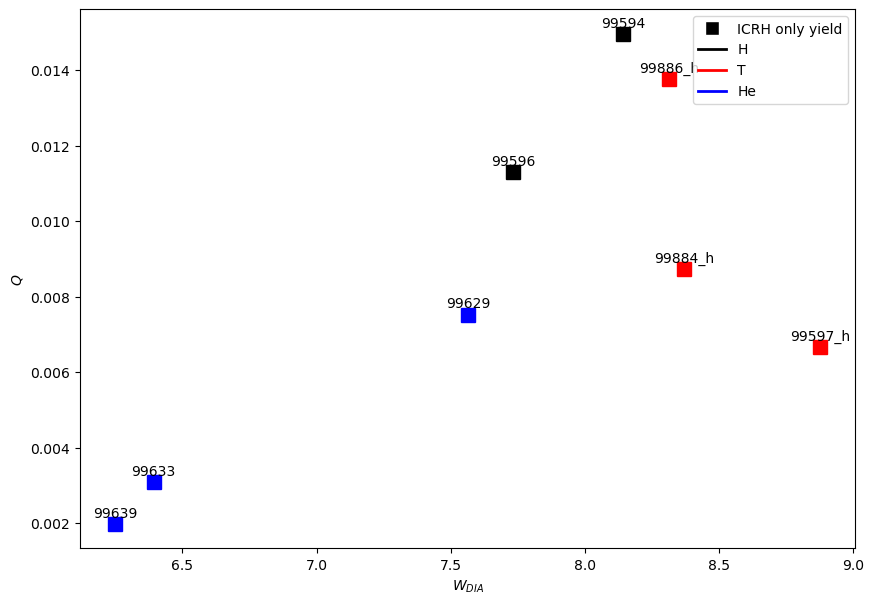

In [22]:
legend_elements2 = [Line2D([0], [0],marker='s', color='w', label='ICRH only yield',
                          markerfacecolor='k', markersize=10),
                                     Line2D([0], [0], linewidth=2,linestyle='-', color='k', label='H',),
                  Line2D([0], [0], linewidth=2,linestyle='-', color='r', label='T',),
                  Line2D([0], [0], linewidth=2,linestyle='-', color='b', label='He',)]
plt.figure(figsize =(10,7))
plt.xlabel('$W_{DIA}$')
plt.ylabel('$Q$')
for i in cases_icrh:
    Z = value_time(pin_nbi[i[4]], times[i[4]])+value_time(pin_icrh[i[4]], times[i[4]])
    if i[4] <=1:
        plt.plot(i[2]/1e6,i[0]/Z, 'ks', markersize=10)
    elif i[4] <=4:
        plt.plot(i[2]/1e6,i[0]/Z, 'rs', markersize=10)
    else:
        plt.plot(i[2]/1e6,i[0]/Z, 'bs', markersize=10)
    plt.annotate("{}".format(i[3]),(i[2]/1e6,i[0]/Z),textcoords = 'offset points', xytext = (0,5), ha = 'center')
    plt.legend(handles = legend_elements2)
plt.savefig('icrh_only.png')

In [23]:
for i in cases_icrh:
    print(i[0],i[4])

343630.808041836 0
494321.77705224993 1
201572.05362783006 2
391311.04454620084 3
235957.14510668936 4
211864.75662186815 5
87887.88770751614 6
51418.17608045353 7


In [24]:
value_time(b,48.9)

5901325.5

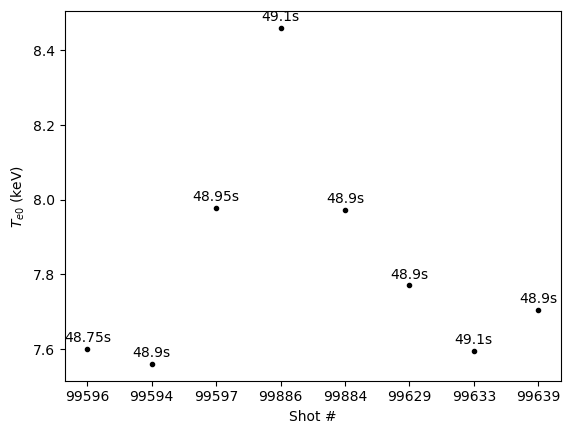

In [25]:
X = range(len(set_shots))
plt.xticks(X, set_shots)
plt.ylabel('$T_{e0}$ (keV)')
plt.xlabel('Shot #')
for i in range(len(set_shots)):
    plt.plot(X[i],data_te[i].data[loc_index(data_te[i],times[i]),0]/1000,'k.')
    plt.annotate("{:.4}s".format(times[i]),(X[i],data_te[i].data[loc_index(data_te[i],times[i]),0]/1000),textcoords = 'offset points', xytext = (0,5), ha = 'center')

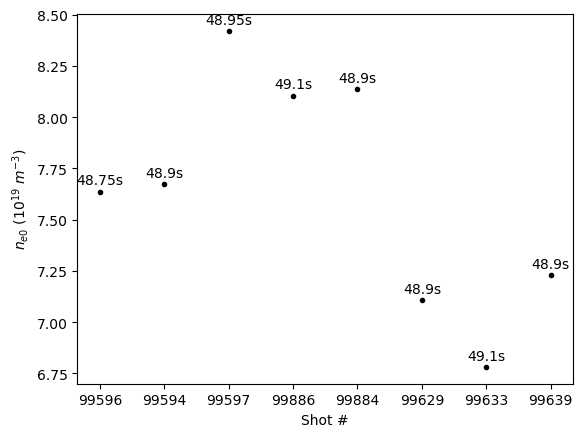

In [26]:
X = range(len(set_shots))
plt.xticks(X, set_shots)
plt.ylabel('$n_{e0}$ ($10^{19}\ m^{-3}$)')
plt.xlabel('Shot #')
for i in range(len(set_shots)):
    plt.plot(X[i],data_ne[i].data[loc_index(data_ne[i],times[i]),0]/1e19,'k.')
    plt.annotate("{:.4}s".format(times[i]),(X[i],data_ne[i].data[loc_index(data_ne[i],times[i]),0]/1e19),textcoords = 'offset points', xytext = (0,5), ha = 'center')

In [27]:
for i in set_shots:
    a = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/tion/ti')
    data_ti.append(a)

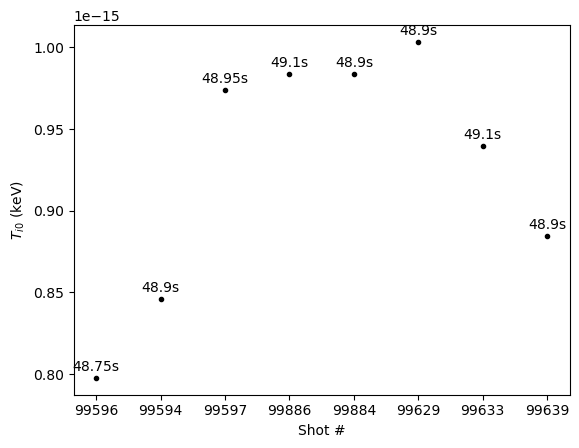

In [28]:
X = range(len(set_shots))
plt.xticks(X, set_shots)
plt.ylabel('$T_{i0}$ (keV)')
plt.xlabel('Shot #')
for i in range(len(set_shots)):
    plt.plot(X[i],data_ti[i].data[loc_index(data_ti[i],times[i]),0]/1e19,'k.')
    plt.annotate("{:.4}s".format(times[i]),(X[i],data_ti[i].data[loc_index(data_ti[i],times[i]),0]/1e19),textcoords = 'offset points', xytext = (0,5), ha = 'center')

In [29]:
#calling DD shots
dd_neon = [96990, 96992, 96993, 96994, 96996, 96998, 96999]
data_dd_neon=[]
data_dd_neon_discharges=[]
data_dd_neon_icrh = []
data_dd_neon_te = []
for i in dd_neon:
    try:
        a = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/pion/pe')
        b = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/icrh/ptot')
        c = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/hrts/te')
        data_dd_neon.append(a)
        data_dd_neon_icrh.append(b)
        data_dd_neon_te.append(c)
        data_dd_neon_discharges.append(str(i))
    except:
        print('JETPPF does not exist for '+str(i)+' discharge')
        try:
            a = sal.get('/pulse/'+str(i)+'/ppf/signal/chain2/pion/pe')
            b = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/icrh/ptot')
            c = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/hrts/te')
            data_dd_neon.append(a)
            data_dd_neon_icrh.append(b)
            data_dd_neon_te.append(c)
            data_dd_neon_discharges.append(str(i))
        except:
            print('chain2 does not exist for '+str(i)+' discharge either')

JETPPF does not exist for 96990 discharge
JETPPF does not exist for 96992 discharge
JETPPF does not exist for 96993 discharge
JETPPF does not exist for 96999 discharge


In [30]:
len(data_dd_neon_te) == len(data_dd_neon)

True

In [31]:
a_dd = []
a_dd_icrh = []
a_dd_te = []
for i in range(len(data_dd_neon_discharges)):
    a_dd.append(np.average(data_dd_neon[i].data[data_dd_neon[i].data>0.1e6])/1e6)
    a_dd_icrh.append(np.average(data_dd_neon_icrh[i].data[data_dd_neon_icrh[i].data>1e6])/1e6)
    a_dd_te.append(np.average(data_dd_neon_te[i].data[:,0][data_dd_neon_te[i].data[:,0]>3e3])/1e3)

Text(0, 0.5, 'Average direct electron damping (MW)')

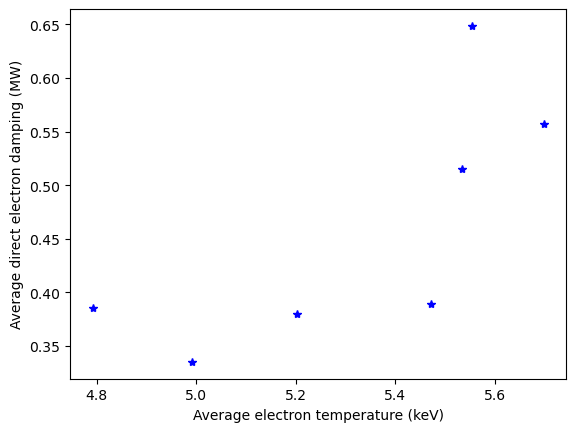

In [32]:
plt.plot(a_dd_te,a_dd, 'b*')
plt.xlabel("Average electron temperature (keV)")
plt.ylabel("Average direct electron damping (MW)")

In [33]:
#calling DT shots
dt = [99520,99795,99796,99797,99799,99805,99861,99862,99863,99878,99943,99944,99948]
data_dt=[]
data_dt_discharges=[]
data_dt_icrh = []
data_dt_te = []
for i in dt:
    try:
        a = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/pion/pe')
        b = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/icrh/ptot')
        c = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/hrts/te')
        data_dt.append(a)
        data_dt_icrh.append(b)
        data_dt_te.append(c)
        data_dt_discharges.append(str(i))
    except:
        print('JETPPF does not exist for '+str(i)+' discharge')
        try:
            a = sal.get('/pulse/'+str(i)+'/ppf/signal/chain2/pion/pe')
            b = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/icrh/ptot')
            c = sal.get('/pulse/'+str(i)+'/ppf/signal/jetppf/hrts/te')
            data_dt.append(a)
            data_dt_icrh.append(b)
            data_dt_te.append(c)
            data_dt_discharges.append(str(i))
        except:
            print('chain2 does not exist for '+str(i)+' discharge either')

JETPPF does not exist for 99520 discharge
JETPPF does not exist for 99795 discharge
JETPPF does not exist for 99796 discharge
JETPPF does not exist for 99797 discharge
JETPPF does not exist for 99799 discharge
JETPPF does not exist for 99805 discharge
JETPPF does not exist for 99861 discharge
JETPPF does not exist for 99862 discharge
JETPPF does not exist for 99878 discharge
JETPPF does not exist for 99943 discharge
JETPPF does not exist for 99944 discharge


In [34]:
data_dt_discharges
np.average(data_dt_icrh[-1].data[data_dt_icrh[-1].data>1e6])/1e6

3.547781

In [35]:
a = []
for i in range(len(data_dd_neon_discharges)):
    a.append(np.average(data_dd_neon[i].data[round(len(data_dd_neon[i].data)/3):2*round(len(data_dd_neon[i].data)/3)])/1e6)

In [36]:
a = []
for i in range(len(data_dt_discharges)):
    a.append(np.average(data_dt[i].data[round(len(data_dt[i].data)/3):2*round(len(data_dt[i].data)/3)])/1e6)

In [37]:
a_dt = []
a_dt_icrh = []
for i in range(len(data_dt_discharges)):
    a_dt.append(np.average(data_dt[i].data[data_dt[i].data>0.1e6])/1e6)
    a_dt_icrh.append(np.average(data_dt_icrh[i].data[data_dt_icrh[i].data>1e6])/1e6)

C:\Users\sherw\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\sherw\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


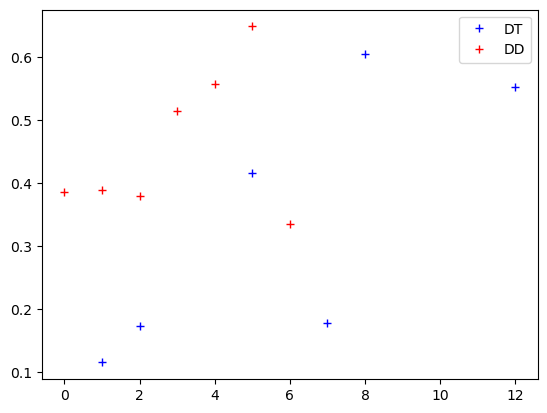

In [38]:
plt.plot(range(len(data_dt_discharges)),a_dt,'b+', label = 'DT')
plt.plot(range(len(data_dd_neon_discharges)),a_dd,'r+', label = 'DD')
plt.legend()

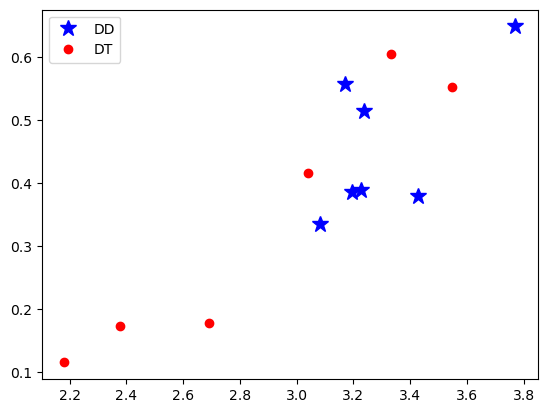

In [39]:
plt.plot(a_dd_icrh,a_dd, 'b*', label = 'DD', markersize = 12)
plt.plot(a_dt_icrh,a_dt, 'r.', label = 'DT', markersize = 12)
plt.legend()

In [40]:
a = sal.get('/pulse/99948/ppf/signal/jetppf/pion/pe')

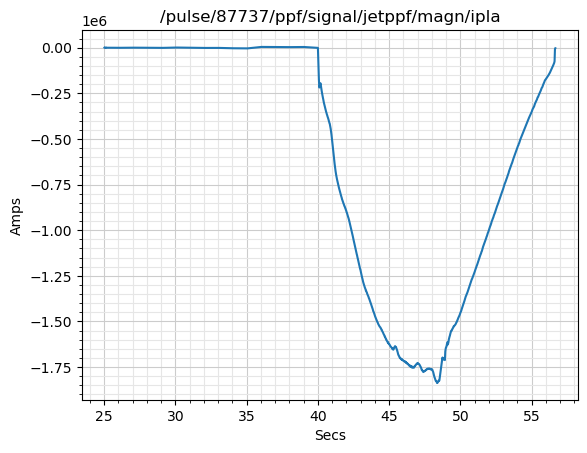

In [41]:
sal.show('/pulse/87737/ppf/signal/jetppf/magn/ipla')

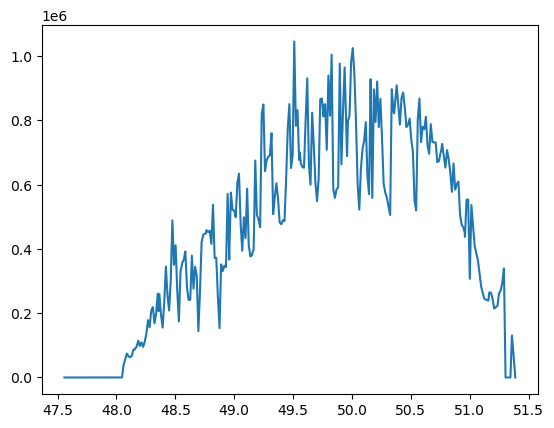

In [42]:
plt.plot(a.dimensions[0].data, a.data)

In [43]:
np.average(a.data[round(len(a.data)/3):2*round(len(a.data)/3)])/1e6

0.636607375

In [44]:
a = sal.get('/pulse/99597/ppf/signal/jetppf/hrt2/te')

In [45]:
a.data[:,0]/1e3

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.31802225, 0.33130234, 0.35600093, 0.38166213,
       0.40704498, 0.42419842, 0.42212763, 0.4200933 , 0.41827893,
       0.4201872 , 0.4230492 , 0.4255897 , 0.42865202, 0.4473371 ,
       0.4664837 , 0.48650506, 0.49076542, 0.47268915, 0.4542522 ,
       0.4357358 , 0.45714593, 0.4887512 , 0.5203725 , 0.5474569 ,
       0.5524052 , 0.557307  , 0.56218547, 0.56667954, 0.57075   ,
       0.5747011 , 0.5784901 , 0.61612785, 0.6566663 , 0.6973111 ,
       0.7101868 , 0.6568899 , 0.60354745, 0.55018723, 0.576166  ,
       0.6410067 , 0.70592135, 0.76662004, 0.7402138 , 0.7138028 ,
       0.68738   , 0.67234606, 0.6730094 , 0.6736652 , 0.67432874,
       0.6908842 , 0.71147543, 0.73204035, 0.7535389 , 0.7792822 ,
       0.8049903 , 0.83079225, 0.86604834, 0.9091461 , 0.95221275,
       0.9952671 , 0.95284605, 0.90312254, 0.8533701 , 0.82966214,
       0.867803  , 0.9059612 , 0.94412196, 0.97192514, 0.99467